In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [2]:
ratings = pd.read_csv('ml-100k/u.data', sep='\t', header=None, names=["user id", "item id", "rating", "timestamp"])

In [3]:
movies = pd.read_csv('ml-100k/u.item', sep='|', header=None, names=["item id","movie title","release date","video release date","IMDb URL","unknown","Action","Adventure","Animation","Children's","Comedy","Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western"])

In [4]:
ratings.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
movies = movies.drop(["movie title", "release date", "video release date", "IMDb URL"], axis=1)
movies.head()

,item id,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [6]:
print ratings.shape, movies.shape

(100000, 4) (1682, 20)


In [7]:
df = pd.merge(ratings.drop(['timestamp'], axis=1), movies, on='item id')
df.head()

,user id,item id,rating,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.shape

(100000, 22)

In [9]:
ratings['item id'].unique().shape

(1682,)

In [10]:
target_user_id = 504

In [11]:
train = pd.concat([df[(df['user id'] == target_user_id) & (df['rating'] < 3)].sample(n=10), df[(df['user id'] == target_user_id) & (df['rating'] > 2)].sample(n=10)])

In [12]:
train

,user id,item id,rating,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
50013,504,1110,2,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
86170,504,67,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
90347,504,548,2,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
89647,504,1093,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8992,504,384,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
78286,504,396,2,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
26804,504,452,2,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
97231,504,834,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
99350,504,1437,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
66098,504,122,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
train.index

Int64Index([50013, 86170, 90347, 89647,  8992, 78286, 26804, 97231, 99350,
            66098, 26310, 59773, 94634, 81093, 54962, 91672, 22481, 71072,
            85551, 24416],
           dtype='int64')

# Approach 1 - User-Based

In [14]:
ub = df[['user id', 'item id', 'rating']].loc[~df.index.isin(train.index)]

In [15]:
ub.loc[:,'rating'] = ub.loc[:,'rating'].apply(lambda x: -1.0 if x < 3 else 1.0)
ub.head()

,user id,item id,rating
0,196,242,1.0
1,63,242,1.0
2,226,242,1.0
3,154,242,1.0
4,306,242,1.0


In [16]:
ub[ub['user id'] == target_user_id].shape

(231, 3)

In [17]:
similarity = pd.DataFrame(columns=['user id', 'similarity'])

In [18]:
similarity['user id'] = ub[ub['user id'] != target_user_id]['user id'].unique()

In [19]:
def same_likes(x, y):
    other_ids   = ub[(ub['rating'] == 1.0) & (ub['user id'] == x)]['item id']
    current_ids = ub[(ub['rating'] == 1.0) & (ub['user id'] == y)]['item id']
    return len(list(set(current_ids) & set(other_ids)))

def same_dislikes(x, y):
    other_ids   = ub[(ub['rating'] == -1.0) & (ub['user id'] == x)]['item id']
    current_ids = ub[(ub['rating'] == -1.0) & (ub['user id'] == y)]['item id']
    return len(list(set(current_ids) & set(other_ids)))

def different_opinions(x, y):
    other_ids   = ub[(ub['rating'] == -1.0) & (ub['user id'] == x)]['item id']
    current_ids = ub[(ub['rating'] == 1.0) & (ub['user id'] == y)]['item id']
    return len(list(set(current_ids) & set(other_ids)))

def all_opinions(x, y):
    other_ids   = ub[(ub['user id'] == x)]['item id']
    current_ids = ub[(ub['user id'] == y)]['item id']
    return len(list(set(current_ids) | set(other_ids)))

def user_similarity(x):
    return (same_likes(x, target_user_id)+same_dislikes(x, target_user_id)-different_opinions(x, target_user_id)-different_opinions(target_user_id, x))/float(all_opinions(x, target_user_id))

In [20]:
similarity['similarity'] = similarity['user id'].apply(user_similarity)

In [21]:
ub = pd.merge(ub, similarity, on='user id')

In [22]:
ub.head()

,user id,item id,rating,similarity
0,196,242,1.0,0.046875
1,196,257,-1.0,0.046875
2,196,111,1.0,0.046875
3,196,25,1.0,0.046875
4,196,382,1.0,0.046875


In [23]:
probability = pd.DataFrame(columns=['movie id', 'probability', 'target rating', 'top list'])

In [24]:
probability['movie id'] = train['item id']
probability['target rating'] = train['rating']

In [25]:
probability.head()

,movie id,probability,target rating,top list
50013,1110,NaN,2,NaN
86170,67,NaN,2,NaN
90347,548,NaN,2,NaN
89647,1093,NaN,1,NaN
8992,384,NaN,2,NaN


In [26]:
def all_likers_similarity(x):
    return ub[(ub['item id'] == x) & (ub['rating'] == 1.0)]['similarity'].sum()

def all_dislikers_similarity(x):
    return ub[(ub['item id'] == x) & (ub['rating'] == -1.0)]['similarity'].sum()

def all_likers_sum(x):
    return ub[(ub['item id'] == x) & (ub['rating'] == 1.0)].shape[0]

def all_dislikers_sum(x):
    return ub[(ub['item id'] == x) & (ub['rating'] == -1.0)].shape[0]
    
def probability_movie(x):
    return (all_likers_similarity(x) - all_dislikers_similarity(x))/(all_likers_sum(x) + all_dislikers_sum(x))

In [27]:
probability['probability'] = probability['movie id'].apply(probability_movie)

In [28]:
approach1_list = probability.sort_values('probability')
approach1_list['top list'] = range(1,21)
approach1_list.head()

,movie id,probability,target rating,top list
99350,1437,-0.043196,2,1
66098,122,-0.012545,1,2
90347,548,-0.001182,2,3
97231,834,0.009276,2,4
26310,719,0.022054,3,5


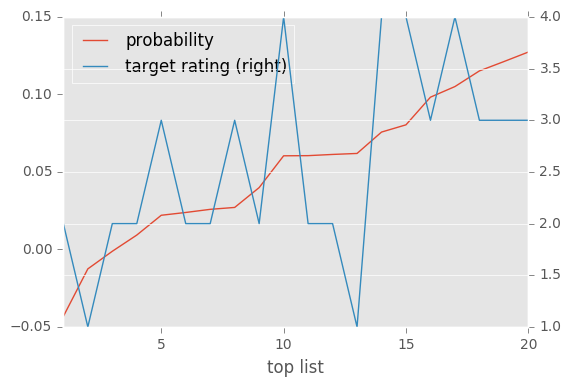

In [29]:
approach1_list.plot(x='top list', y=['probability', 'target rating'],secondary_y=['target rating'])

# Approach 2 - Content-Based

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
cb = df[df['user id'] == target_user_id]
cb = cb.loc[~cb.index.isin(train.index)]
cb.loc[:, 'rating':'Western'] = cb.loc[:, 'rating':'Western'].astype(float)

In [32]:
cb.head()

,user id,item id,rating,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
456,504,51,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1094,504,465,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1237,504,451,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1559,504,257,5.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2256,504,40,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
cb.shape

(231, 22)

In [34]:
regr = LinearRegression()
regr.fit(cb.loc[:, 'unknown':'Western'], cb['rating'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
train[train['item id'] == 154].loc[:, 'unknown':'Western'].astype(float)

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western


In [36]:
def probability2_movie(x):
    return regr.predict(train[train['item id'] == x].loc[:, 'unknown':'Western'].astype(float))[0]

In [37]:
probability2 = pd.DataFrame(columns=['movie id', 'probability', 'target rating', 'top list'])
probability2['movie id'] = train['item id']
probability2['target rating'] = train['rating']
probability2['probability'] = probability2['movie id'].apply(probability2_movie)

In [38]:
approach2_list = probability2.sort_values('probability')
approach2_list['top list'] = range(1,21)
approach2_list.head()

,movie id,probability,target rating,top list
50013,1110,3.135191,2,1
85551,63,3.344978,3,2
99350,1437,3.372520,2,3
8992,384,3.372520,2,4
66098,122,3.372520,1,5


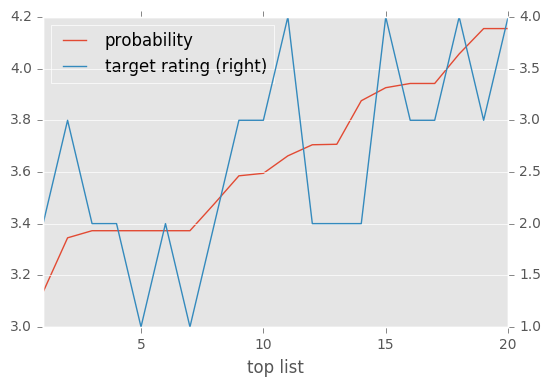

In [39]:
approach2_list.plot(x='top list', y=['probability', 'target rating'],secondary_y=['target rating'])

# Approach 3 - Content-User-Based

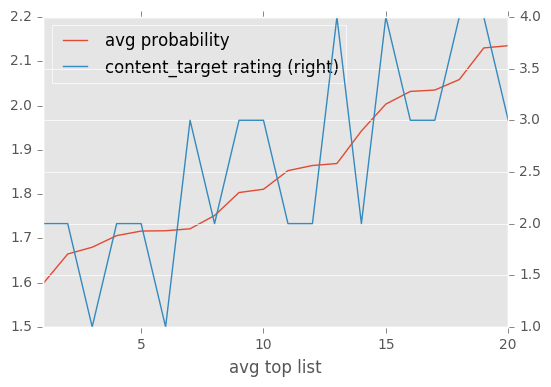

In [40]:
approach3_list = pd.concat([approach1_list.add_prefix('user_'), approach2_list.add_prefix('content_')], axis=1, join='inner')
approach3_list['avg probability'] = (approach3_list["user_probability"]+approach3_list["content_probability"])/2.0
approach3_list = approach3_list.sort_values('avg probability')
approach3_list['avg top list'] = range(1,21)
approach3_list.plot(x='avg top list', y=['avg probability', 'content_target rating'],secondary_y=['content_target rating'])

# Conclusion

In [41]:
from scipy.stats import pearsonr

In [42]:
approach1_corr = pearsonr(approach1_list['probability'], approach1_list['target rating'])
approach2_corr = pearsonr(approach2_list['probability'], approach2_list['target rating'])
approach3_corr = pearsonr(approach3_list['avg probability'], approach3_list['content_target rating'])

print 'Approach 1: ', approach1_corr
print 'Approach 2: ', approach2_corr
print 'Approach 3: ', approach3_corr

Approach 1:  (0.55863927550803838, 0.010459757676356556)
Approach 2:  (0.65170201719447185, 0.0018505270189291601)
Approach 3:  (0.68200286811224509, 0.00092553793958709838)
